<a href="https://colab.research.google.com/github/moniic/Play-Store-Data-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
# Import the dataset - Play Store Apps Data Analysis#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Play Store App Dataset & Users Reviews Dataset

In [3]:
df_user_reviews = pd.read_csv ('/content/drive/MyDrive/User Reviews.csv')
df_app_data = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

# Step 1-To explore the both Play Store App data


In [4]:
# To check the summary of the Play Store App dataset
df_app_data.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

#Step 2- Data Cleaning & Data Wrangling

**Q1. Display all the columns of Play store dataset.**





In [5]:
# To check the all columns of Play Store App Data
df_app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
#To find the misprinted values row in Play Store App Data
df_app_data[df_app_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
# Update correct values of row index 10472 with their resspective columns by using loc method

df_app_data.loc[10472, ['App']] = ['Life Made WI-Fi Touchscreen Photo Frame']
df_app_data.loc[10472, ['Category']] = ['NaN']
df_app_data.loc[10472, ['Rating']] = [1.9]
df_app_data.loc[10472, ['Reviews']] = [19.0]
df_app_data.loc[10472, ['Size']] = ['3.0M']
df_app_data.loc[10472, ['Installs']] = ['1,000+']
df_app_data.loc[10472, ['Type']] = ['Free']
df_app_data.loc[10472, ['Price']] = [0]
df_app_data.loc[10472, ['Content Rating']] = ['Everyone']
df_app_data.loc[10472, ['Genres']] = ['NaN']
df_app_data.loc[10472, ['Last Updated']] = ['[February 11,2018]']
df_app_data.loc[10472, ['Current Ver']] = ['1.0.19']
df_app_data.loc[10472, ['Android Ver']] = ['4.0 and up']

#Print the updated row index 10472

df_app_data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                           [February 11,2018]
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [8]:
 #To check the data type for all columns
df_app_data.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#Step-3 Treat Null values of Play Store Data

In [9]:
#To check & count the null values in all columns

df_app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [10]:
# To replace all the null values with zero in Rating column
df_app_data.fillna({'Rating': 0}, inplace = True)

In [11]:
df_app_data.Rating.isnull().sum()

0

In [12]:
#To convert the data type for Reviews & Rating columns from Object to Integer
df_app_data = df_app_data.astype({'Reviews': 'int64', 'Rating': 'int64'})
(df_app_data)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
#Print the updated data types for all columns
df_app_data.dtypes


App               object
Category          object
Rating             int64
Reviews            int64
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [14]:
df_app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#Step 4- Perform exploratory data analysis

**Q2 Which App has highest reviews?**



In [15]:
# To check the highest reviews from the Play store app dataset
df_app_data['Reviews'].max()

78158306

In [16]:
df_app_data.loc[df_app_data['Reviews'].idxmax()]

App                         Facebook
Category                      SOCIAL
Rating                             4
Reviews                     78158306
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2544, dtype: object

**Q3 Which is the highest rating App?**

In [17]:
# To find the maximum value of Rating column variable
df_app_data.loc[df_app_data['Rating'].idxmax()]

App               Hojiboy Tojiboyev Life Hacks
Category                                COMICS
Rating                                       5
Reviews                                     15
Size                                       37M
Installs                                1,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                                  Comics
Last Updated                     June 26, 2018
Current Ver                                2.0
Android Ver                       4.0.3 and up
Name: 329, dtype: object

**Q4 Display the Top 5 Apps which has maximum reviews.**


In [18]:
Max_reviews_Apps = df_app_data.sort_values(['Reviews'], ascending = False)
Max_reviews_Apps



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,eP Finder,AUTO_AND_VEHICLES,0,0,6.3M,10+,Free,0,Everyone,Auto & Vehicles,"June 21, 2018",1.0,4.4 and up
8495,HDWallpaper DK,PERSONALIZATION,0,0,6.6M,10+,Free,0,Teen,Personalization,"October 5, 2017",1.0,4.0 and up
6277,Bi-Tank Ads Free,GAME,0,0,Varies with device,1+,Paid,$0.99,Everyone,Arcade,"July 31, 2017",1.1,4.1 and up
8489,DK Primrose for KLWP,PERSONALIZATION,0,0,16M,1+,Paid,$0.99,Everyone,Personalization,"December 2, 2017",v2017.Dec.01.19,4.4 and up


In [19]:
#Remove duplicate rows from the Play store App Data
max_reviews_App_updated = Max_reviews_Apps.drop_duplicates(subset = 'App').head(5).reset_index()
max_reviews_App_updated

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,2544,Facebook,SOCIAL,4,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,381,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,2604,Instagram,SOCIAL,4,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,1879,Clash of Clans,GAME,4,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


#Step 5- Data Visualization

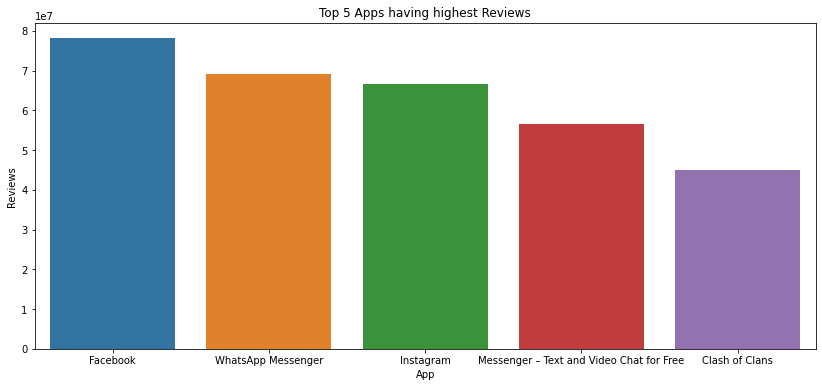

In [20]:
plt.figure(figsize = (14,6))
plt.title('Top 5 Apps having highest Reviews')
plt.xlabel('App')
plt.ylabel('Reviews')
sns.barplot(data = max_reviews_App_updated, x = 'App', y = 'Reviews')
plt.show()

**Q5 Display Top 5 Categories which has highest rating.**

In [21]:
#Sort Rating column frpm highest to lowest to get the Top 5 higest rating apps
top_rated_apps = df_app_data.sort_values (['Rating'], ascending = False).reset_index(drop = True).head(5)

top_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,CB Heroes,SOCIAL,5,5,1.8M,5+,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up
1,AJ RETAILS,SHOPPING,5,9,169k,10+,Free,0,Everyone,Shopping,"June 1, 2018",18060104,2.2 and up
2,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5,43,2.3M,100+,Free,0,Everyone,News & Magazines,"June 22, 2018",1.0,4.4 and up
3,BP Journal - Blood Pressure Diary,MEDICAL,5,6,26M,"1,000+",Free,0,Everyone,Medical,"May 25, 2018",1.0.32,4.4 and up
4,EF Academy,HEALTH_AND_FITNESS,5,4,15M,50+,Free,0,Everyone,Health & Fitness,"March 23, 2018",7.7.3,4.1 and up


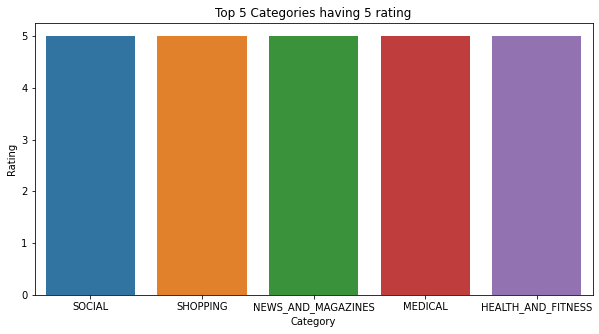

In [22]:
plt.figure(figsize = (10, 5))
plt.title('Top 5 Categories having 5 rating')
plt.xlabel('Category')
plt.ylabel('Rating')

sns.barplot(data = top_rated_apps, x = 'Category', y = 'Rating')

plt.show()

#Step 6 - To explore User Reviews data

In [23]:
# To check & explore all the columns in the User Reviews Dataset
df_user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [24]:
# To check the data type for all columns
df_user_reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [25]:
#To display the top 20 rows of User Reviews Dataset
df_user_reviews.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [26]:
#To display the last 20 rows of User Reviews Dataset
df_user_reviews.tail(20)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64275,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64276,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64277,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64278,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64279,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64280,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64281,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64282,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64283,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64284,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


#Step 7- Data Cleaning & Data Wrngling for User_Reviews data

In [27]:
#To check & count the null values in all columns

df_user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [28]:
# To replace all the null values with zero in Rating column
df_user_reviews.fillna({'Translated_Review': 0, 'Sentiment': 0,'Sentiment_Polarity': 0, 'Sentiment_Subjectivity':0}, inplace = True)

In [29]:
df_user_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [30]:
#To display the unique Apps from User Reviews Dataset
df_user_reviews.App.unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

#Step 8- Perform exploratory data analysis

**Q6 Identify the User sentiment type ratio.**

In [31]:
user_sentiment = df_user_reviews['Sentiment'].value_counts().reset_index().rename(columns= {'index' : 'Sentiment', 'Sentiment' : 'Counts'})
print(user_sentiment) 

  Sentiment  Counts
0         0   26863
1  Positive   23998
2  Negative    8271
3   Neutral    5163


#Step 9- Data Visualization for User Reviews data

In [32]:
user_sentiment_updated = user_sentiment.drop(0)

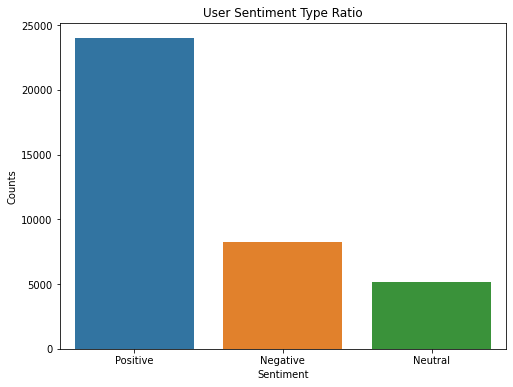

In [33]:
plt.figure(figsize = (8,6))
plt.title('User Sentiment Type Ratio')
plt.xlabel ('Sentiment')
sns.barplot(data = user_sentiment_updated, x = 'Sentiment', y = 'Counts')
plt.show()

In [34]:
App_sentiment = df_user_reviews.groupby(['App', 'Sentiment']).size().sort_values(ascending = False).reset_index().rename(columns = {0 : 'Counts'})
App_sentiment

,App,Sentiment,Counts
0,ESPN,0,240
1,Helix Jump,Positive,209
2,Calorie Counter by FatSecret,0,200
3,"Bleacher Report: sports news, scores, & highli...",0,200
4,Duolingo: Learn Languages Free,Positive,200
...,...,...,...
3353,Banjo,0,1
3354,H TV,0,1
3355,Free Hypnosis,Negative,1
3356,Free Live Talk-Video Call,Negative,1


In [35]:
Apps_positive_sentiment = pd.DataFrame(App_sentiment[App_sentiment['Sentiment'] == 'Positive']).head(5).reset_index()
Apps_positive_sentiment


,index,App,Sentiment,Counts
0,1,Helix Jump,Positive,209
1,4,Duolingo: Learn Languages Free,Positive,200
2,8,Calorie Counter - Macros,Positive,174
3,9,Bowmasters,Positive,169
4,10,Calorie Counter - MyFitnessPal,Positive,169


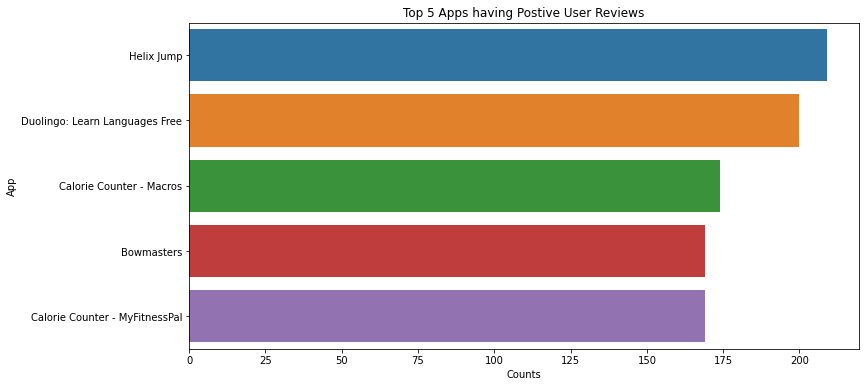

In [36]:
plt.figure(figsize = (12,6))
plt.title('Top 5 Apps having Postive User Reviews')
plt.xlabel('Counts')
sns.barplot(data = Apps_positive_sentiment, x = 'Counts', y = 'App')
plt.show()

**Q7. Identify Top 5 Apps having negative user sentiment reviews**

In [37]:
#Display top 5 maximum negative user sentiment reviews
Apps_negative_sentiment = pd.DataFrame(App_sentiment[App_sentiment['Sentiment'] == 'Negative']).head(5).reset_index()
Apps_negative_sentiment


,index,App,Sentiment,Counts
0,14,Angry Birds Classic,Negative,147
1,23,Candy Crush Saga,Negative,126
2,40,Bowmasters,Negative,119
3,49,8 Ball Pool,Negative,106
4,71,Candy Crush Soda Saga,Negative,96


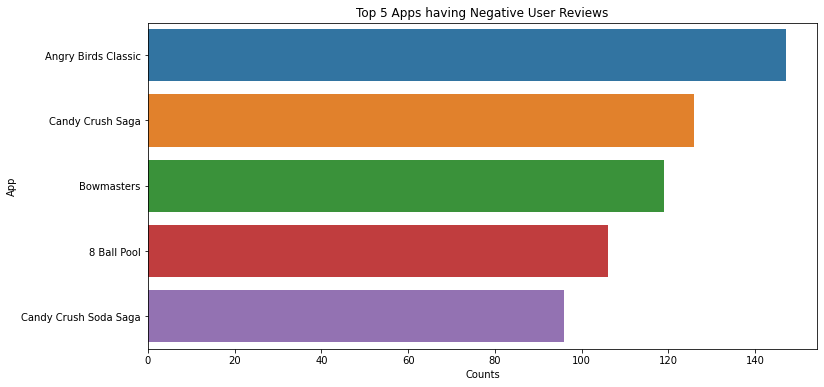

In [38]:
plt.figure(figsize = (12,6))
plt.title('Top 5 Apps having Negative User Reviews')
plt.xlabel('Counts')
sns.barplot(data = Apps_negative_sentiment, x = 'Counts', y = 'App')
plt.show()